<h1>CS 41344 - Natural Language Processing</h1>
<h2 style = 'color:yellow'>1.4 Semantic Analysis</h2>

<ul>
    <li>Principal Component Analysis and Eigen Decomposition</li>
    <li>Singular Value Decomposition (SVD)</li>
    <li>Latent Semantic Analysis</li>
    <li>Latent Dirichlet Allocation</li>
</ul>

<h3 style = 'color:lightgreen'>1.4.0 Import Libraries</h3>

In [110]:
from IPython.display import Image
import numpy as np
import pandas as pd
from scipy import linalg as lg
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD

In [2]:
np.set_printoptions(precision=4, suppress=True)

<h3 style = 'color:lightgreen'>1.4.1 Principal Components Analsis and Eigen Decomposition</h3>

When we vectorize a corpus dataset, it has several dimensions and it is very sparse. <b>PCA</b> and <b>Latent Sementic Analysis</b> can be used to reduce the dimensionality of the dataset. Advantages of LSA are:

1. LSA can be used to reduce the dimensionality of the dataset.
2. Classify documents based on the latent features.



What is <b>Principal Components Analysis (PCA)</b>?

PCA is the process of computing the <b>principal components</b> of a dataset and using them to perform a change of basis on the data. Sometimes using only the first few principal components and ignoring the rest results in higher accuracy. PCA creates new datasets whose variables have the maximum information content. PCA components are orthogonal to each other (i.e., they are not correlated) and the data is normalized with standard deviation = 1.

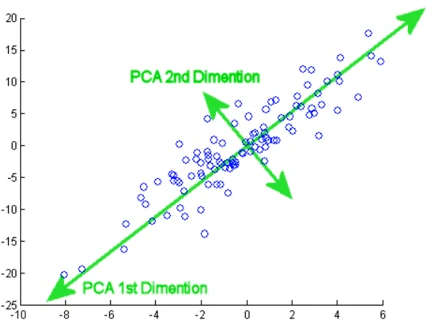

In [3]:
Image("../3. Images/PCA - 1.png")

An <b>eigenvector</b> of a linear transformation is a non-zero vector that only changes by a scalar factor, when linear transformation is applied to it.

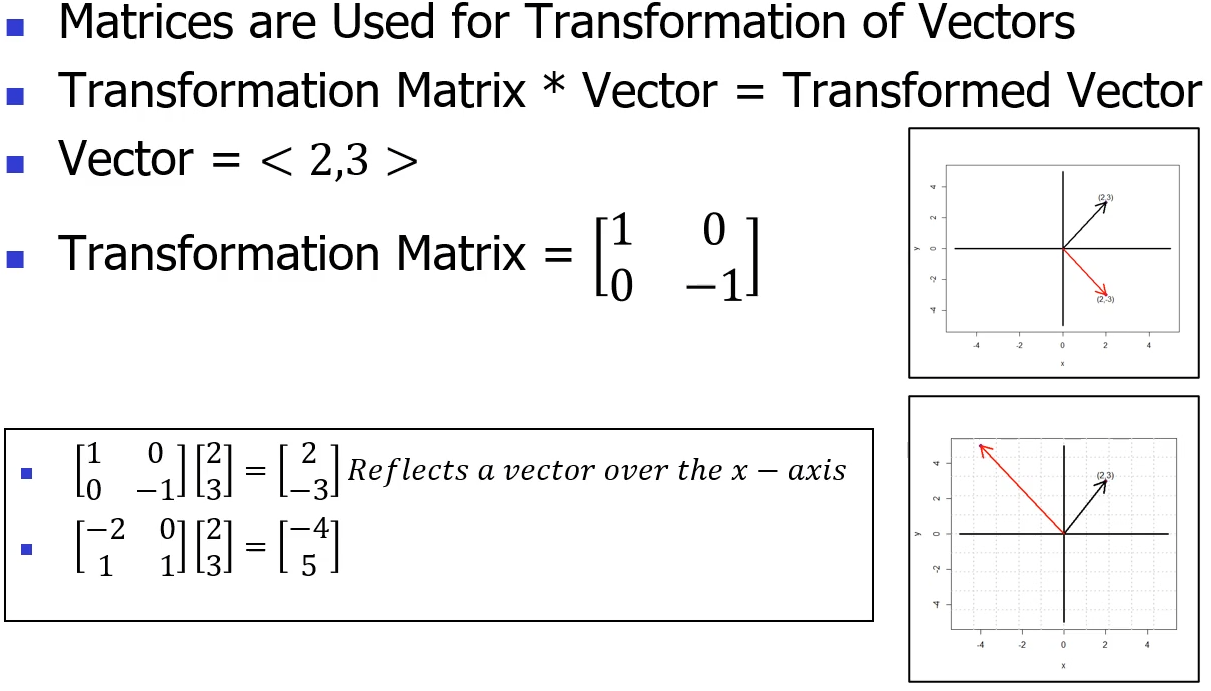

In [4]:
Image("../3. Images/Matrix Transformation.png")

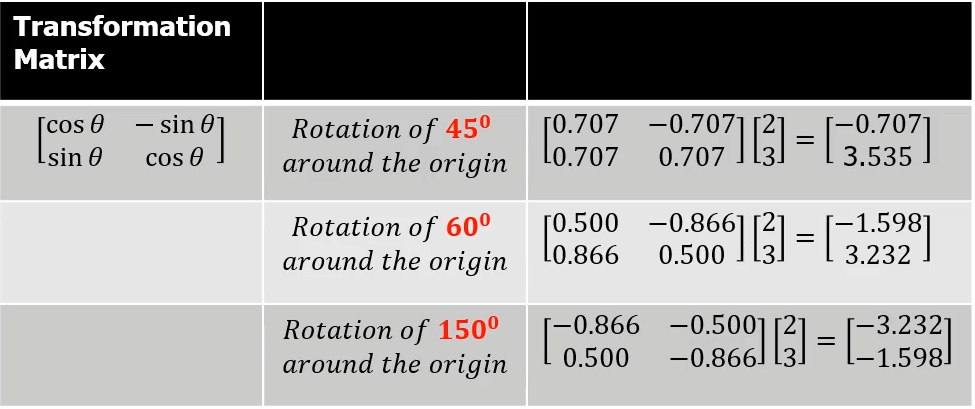

In [5]:
Image("../3. Images/Matrix Transformation (Trig).png")

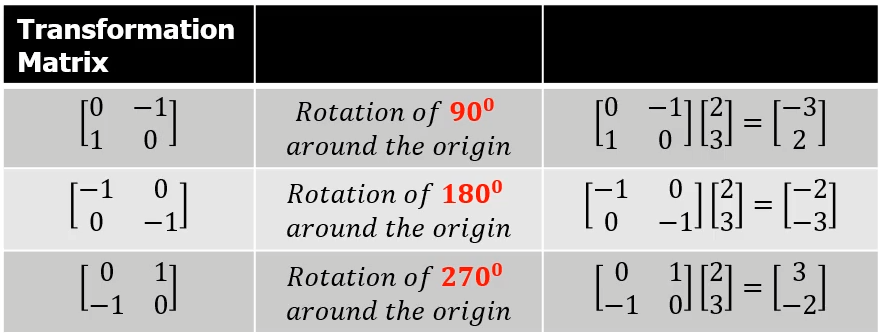

In [6]:
Image("../3. Images/Matrix Transformation (Trig - 2).png")


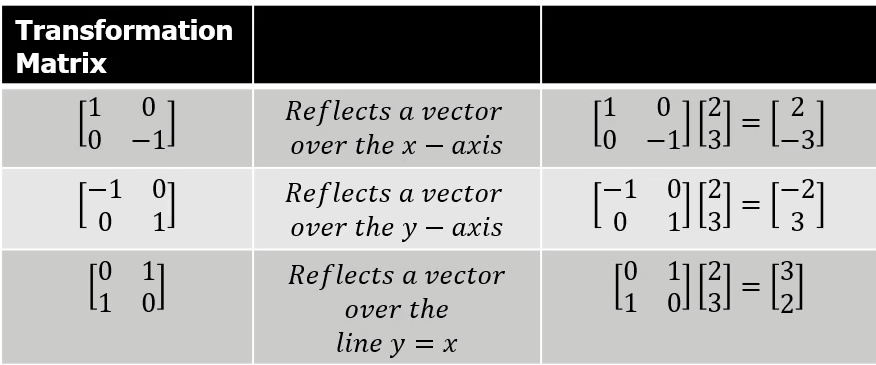

In [7]:
Image("../3. Images/Matrix Transformation (Trig - 3).png")

In [8]:
A = np.array([[3, 2], [3, -2]])
A

array([[ 3,  2],
       [ 3, -2]])

In [9]:
values, vectors = lg.eig(A)
values, vectors

(array([ 4.+0.j, -3.+0.j]),
 array([[ 0.8944, -0.3162],
        [ 0.4472,  0.9487]]))

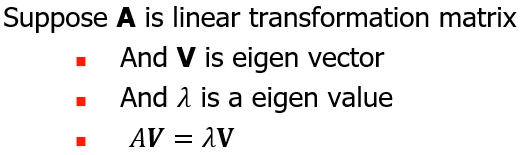

In [10]:
Image("../3. Images/Eigen Decomposition - 1.png")

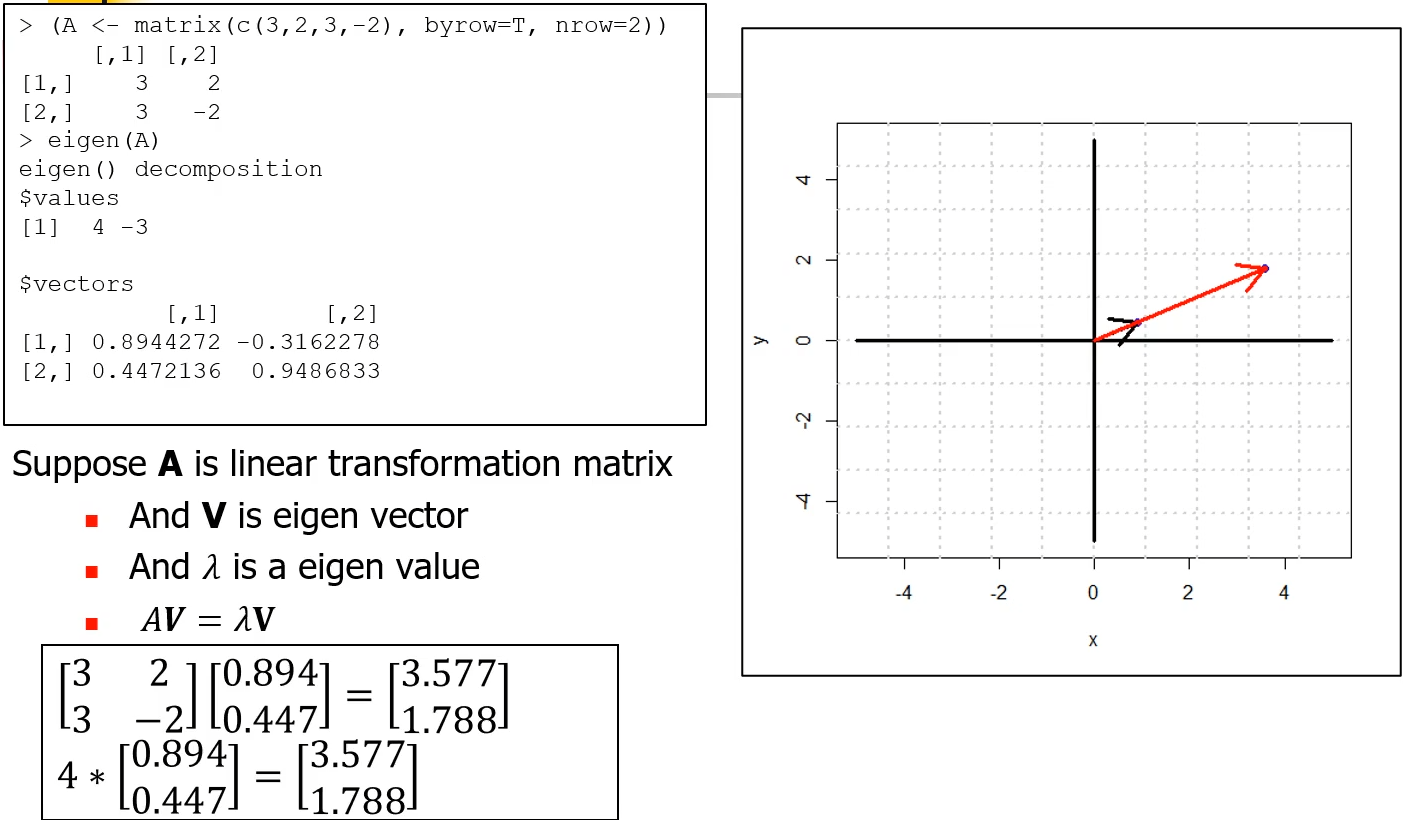

In [11]:
Image("../3. Images/Eigen Decomposition - 2.png")

In [12]:
B = np.array([
    [1, 1, 5],
    [4, 2, 6],
    [5, 3, 11]
])
B

array([[ 1,  1,  5],
       [ 4,  2,  6],
       [ 5,  3, 11]])

In [13]:
values, vectors = lg.eig(B)
print(values)
print()
print(vectors)

[14.8102+0.j -0.8102+0.j -0.    +0.j]

[[ 0.3288  0.6584  0.2722]
 [ 0.4828 -0.7474 -0.9526]
 [ 0.8116 -0.0889  0.1361]]


In [14]:
first_eigenvalue = np.real(values[0])
first_eigenvector = vectors[:, 0]

print(f"First Eigenvalue: {first_eigenvalue}")
print(f"First Eigenvector: {first_eigenvector}")

First Eigenvalue: 14.810249675906668
First Eigenvector: [0.3288 0.4828 0.8116]


In [15]:
np.dot(B, first_eigenvector)

array([ 4.8698,  7.1508, 12.0206])

In [16]:
np.dot(first_eigenvalue, first_eigenvector)

array([ 4.8698,  7.1508, 12.0206])

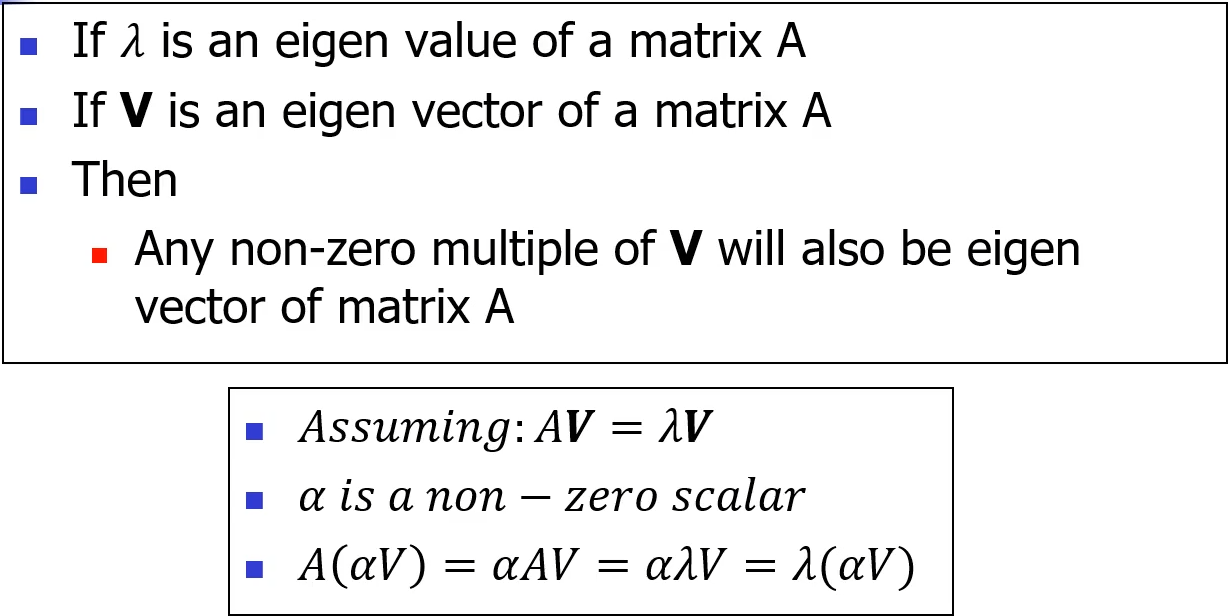

In [17]:
Image("../3. Images/Eigen Decomposition - 3.png")

<h3 style = 'color:lightgreen'>1.4.2 Singular Value Decomposition (SVD)</h3>

<b>SVD</b> is a matrix decomposition method for reducing a matrix to its constituent parts in order to make certain subsequent matrix calculations simpler. The diagonal values in the Sigma matrix are known as the singular values of the original matrix A.

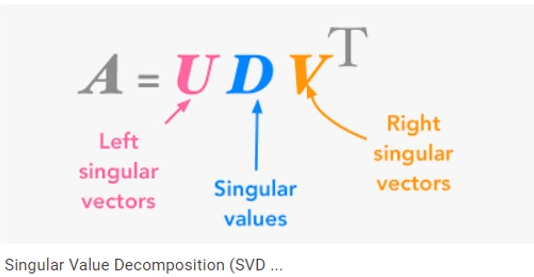

In [18]:
Image("../3. Images/SVD - 1.png")

<b>U</b> is the eigenvector of AAT, whereas <b>V</b> is the eigenvector of ATA.
The eigenvalues (singular values) are the square root of the eigenvalues of AAT and ATA.

In [19]:
# Create a 4x4 random matrix

np.random.seed(121)
A = np.random.rand(4, 4)
A

array([[0.1113, 0.2108, 0.233 , 0.1519],
       [0.8302, 0.4079, 0.5558, 0.7455],
       [0.2485, 0.9687, 0.9527, 0.4898],
       [0.0183, 0.8576, 0.4049, 0.6225]])

In [20]:
# Calculate the SVD

U, S, VT = lg.svd(A)

print(U)
print()
print(S)
print()
print(VT)

[[-0.1688  0.0006 -0.128  -0.9773]
 [-0.5412 -0.8279  0.1257  0.0765]
 [-0.6618  0.3552 -0.6301  0.197 ]
 [-0.4906  0.434   0.7555 -0.014 ]]

[2.1533 0.725  0.3563 0.0072]

[[-0.2979 -0.6121 -0.543  -0.4916]
 [-0.8153  0.5223  0.0746 -0.2386]
 [-0.1479  0.1736 -0.7139  0.662 ]
 [ 0.474   0.5678 -0.4357 -0.5129]]


In [21]:
# Recreate the original matrix

A_reconstructed = np.dot(U, np.dot(np.diag(S), VT))
A_reconstructed

array([[0.1113, 0.2108, 0.233 , 0.1519],
       [0.8302, 0.4079, 0.5558, 0.7455],
       [0.2485, 0.9687, 0.9527, 0.4898],
       [0.0183, 0.8576, 0.4049, 0.6225]])

In [26]:
# Let's create a matrix where the 4th row is a linear combination of the second and the third row

A = np.array([
    [0.2325, 0.5597, 0.974, 0.4009],
    [0.9361, 0.9272, 0.3808, 0.497],
    [0.5044, 0.7436, 0.9957, 0.7429],
    [0.0, 0.0, 0.0, 0.0]
])
A

array([[0.2325, 0.5597, 0.974 , 0.4009],
       [0.9361, 0.9272, 0.3808, 0.497 ],
       [0.5044, 0.7436, 0.9957, 0.7429],
       [0.    , 0.    , 0.    , 0.    ]])

In [27]:
A[3] = 5 * A[1] + 6 * A[2]
A

array([[0.2325, 0.5597, 0.974 , 0.4009],
       [0.9361, 0.9272, 0.3808, 0.497 ],
       [0.5044, 0.7436, 0.9957, 0.7429],
       [7.7069, 9.0976, 7.8782, 6.9424]])

In [30]:
# Let's decompose the matrix
# We notice that the last singular value is very close to zero. That's because the 4th row is a linear combination of the second and the third row

U, S, VT = lg.svd(A)

print(U)
print()
print(S.T)

[[-0.068   0.6776  0.7323  0.    ]
 [-0.0866 -0.5675  0.517  -0.635 ]
 [-0.0928  0.4661 -0.4399 -0.762 ]
 [-0.9896 -0.0406 -0.0544  0.127 ]]

[16.0552  0.7625  0.174   0.    ]


<h4 style = 'color:green'>1.4.2.1 Decomposing a Square Matrix</h4>

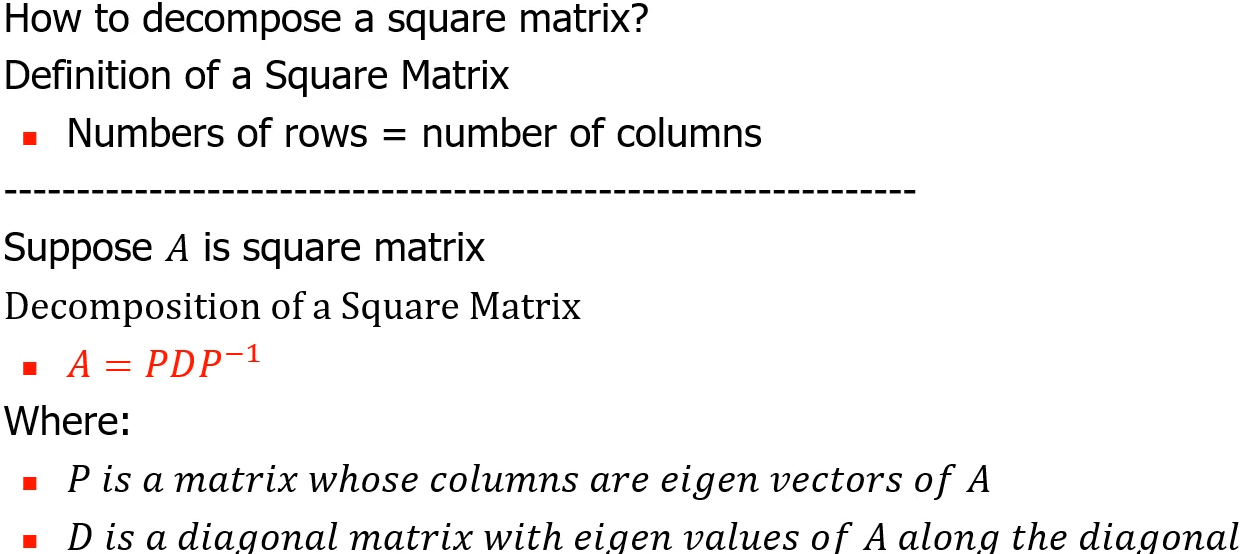

In [32]:
# Let's decompose a square matrix, such that when we multiply all the three components, we get the original matrix

Image("../3. Images/Decomposing a Square Matrix.png")

In [33]:
# Create a square matrix
A = np.array([
    [1, 3, 3],
    [-3, -5, -3],
    [3, 3, 1]
])
print(A)

[[ 1  3  3]
 [-3 -5 -3]
 [ 3  3  1]]


In [34]:
# Compute the Eigen Vector and Eigen Values

values, vectors = lg.eig(A)
print(values)
print()
print(vectors)

[ 1.+0.j -2.+0.j -2.+0.j]

[[ 0.5774 -0.     -0.7111]
 [-0.5774 -0.7071  0.7031]
 [ 0.5774  0.7071  0.008 ]]


In [36]:
# Recreate the original matrix

r = np.dot(vectors, np.diag(values))
A_recreated = np.dot(r, lg.inv(vectors))
print(A_recreated)

[[ 1.+0.j  3.+0.j  3.+0.j]
 [-3.+0.j -5.+0.j -3.+0.j]
 [ 3.+0.j  3.+0.j  1.+0.j]]


In [37]:
A_recreated.astype(int)

C:\Users\Owner\AppData\Local\Temp\ipykernel_481328\318682108.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  A_recreated.astype(int)


array([[ 1,  3,  3],
       [-2, -5, -3],
       [ 2,  3,  1]])

<h4 style = 'color:green'>1.4.2.2 Decomposing a Square and Symmetric Matrix</h4>

For a square and symmetric matrix A, the inverse of the eigen vector (A) = Transpose of the eigen vector (A)

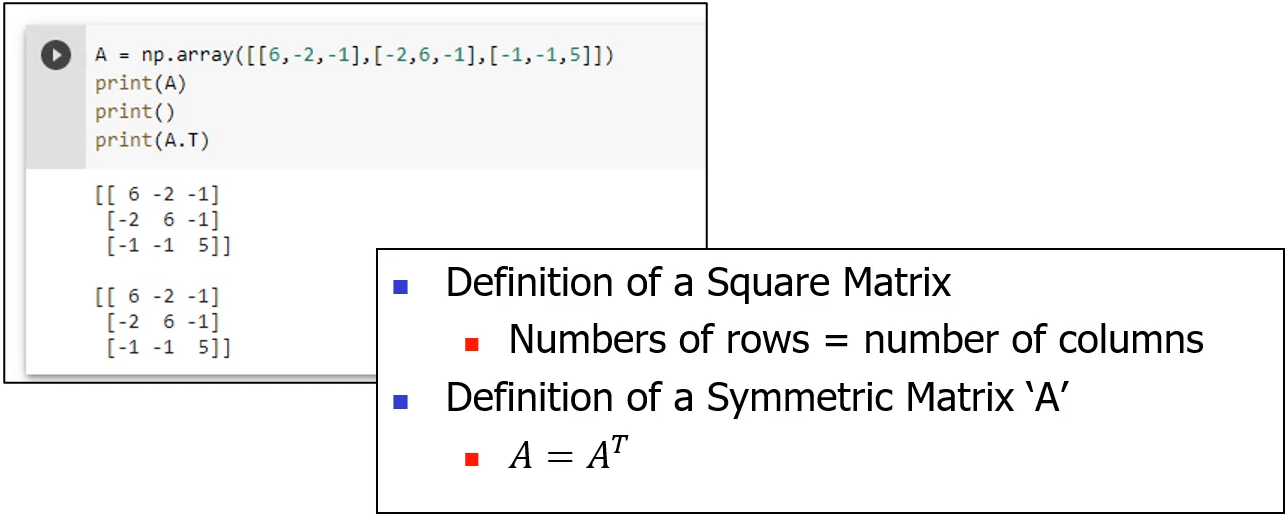

In [38]:
Image("../3. Images/Decomposing a Square and Symetric Matrix.png")

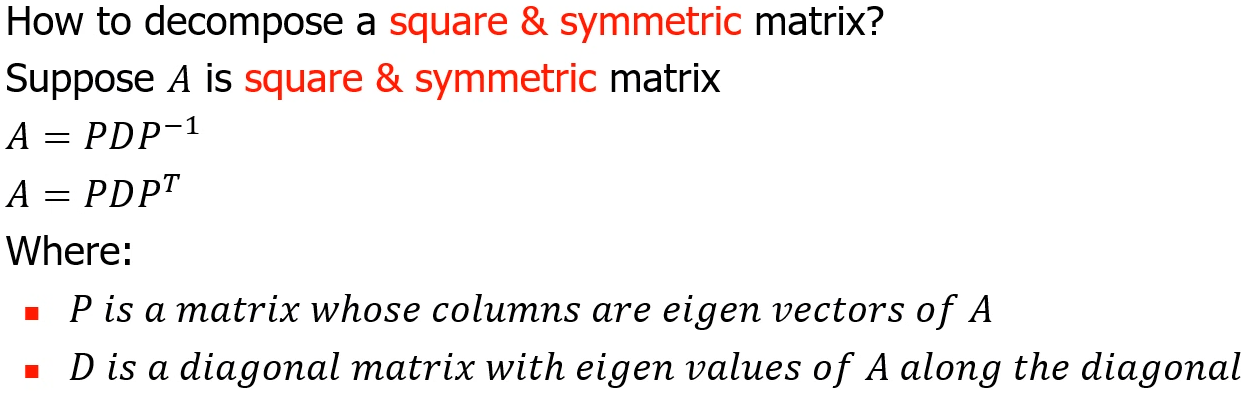

In [44]:
Image("../3. Images/Decomposing a Square and Symetric Matrix - 2.png")

In [39]:
A = np.array([
    [6, -2, -1],
    [-2, 6, -1],
    [-1, -1, 5]
])
A

array([[ 6, -2, -1],
       [-2,  6, -1],
       [-1, -1,  5]])

In [40]:
values, vectors = lg.eig(A)
print(values)
print()
print(vectors)

[3.+0.j 8.+0.j 6.+0.j]

[[ 0.5774  0.7071 -0.4082]
 [ 0.5774 -0.7071 -0.4082]
 [ 0.5774 -0.      0.8165]]


In [42]:
print(f"Inverse of Eigen Vectors:\n {lg.inv(vectors)}")

Inverse of Eigen Vectors:
 [[ 0.5774  0.5774  0.5774]
 [ 0.7071 -0.7071  0.    ]
 [-0.4082 -0.4082  0.8165]]


In [43]:
print(f"Transpose of Eigen Vectors:\n {vectors.T}")

Transpose of Eigen Vectors:
 [[ 0.5774  0.5774  0.5774]
 [ 0.7071 -0.7071 -0.    ]
 [-0.4082 -0.4082  0.8165]]


In [47]:
# Recreate the original matrix using the Inverse of the Eigen Vectors
r = np.dot(vectors, np.diag(values))
A_recreated = np.dot(r, lg.inv(vectors))
print(A_recreated)

[[ 6.+0.j -2.+0.j -1.+0.j]
 [-2.+0.j  6.+0.j -1.+0.j]
 [-1.+0.j -1.+0.j  5.+0.j]]


In [48]:
# Recreate the original matrix using the Transpose of the Eigen Vectors
r = np.dot(vectors, np.diag(values)) #This creates a matrix with the eigenvalues on the diagonal
A_recreated = np.dot(r, (vectors.T))
print(A_recreated)

[[ 6.+0.j -2.+0.j -1.+0.j]
 [-2.+0.j  6.+0.j -1.+0.j]
 [-1.+0.j -1.+0.j  5.+0.j]]


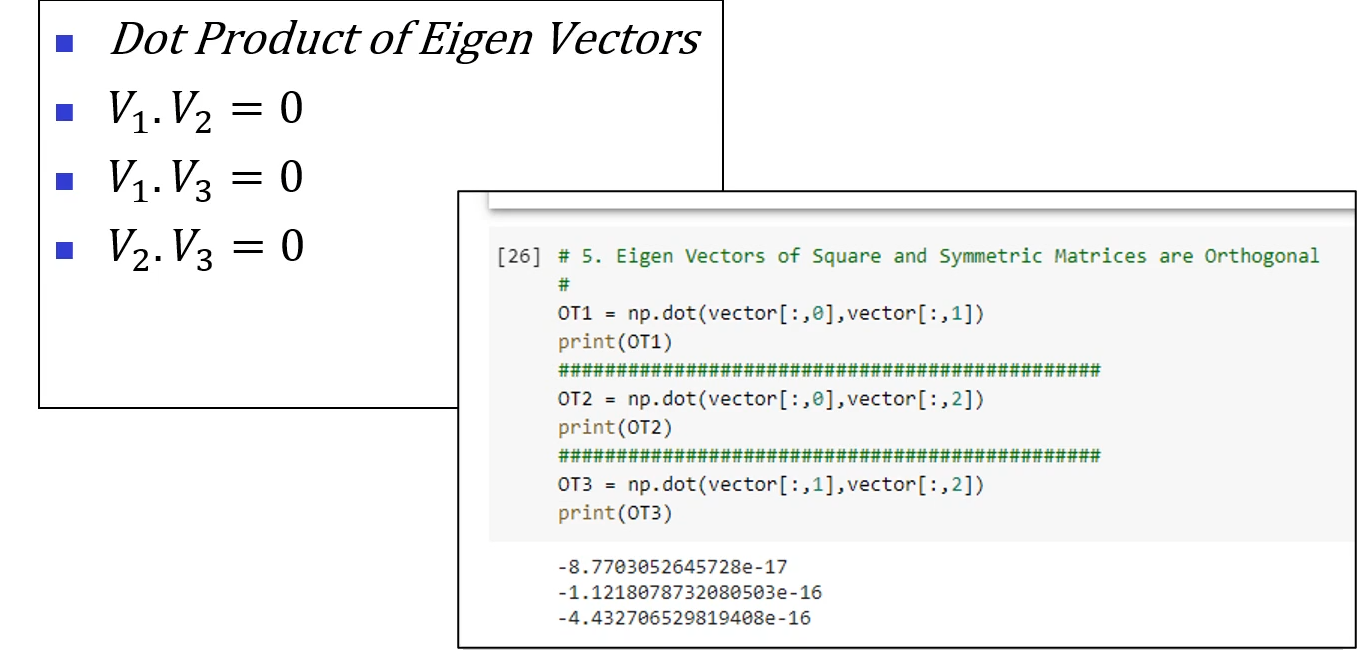

In [49]:
Image("../3. Images/Orthogonal.png")

In [50]:
v1 = vectors[0, :]
v2 = vectors[1, :]
v3 = vectors[2, :]

np.dot(v1, v2)

1.1102230246251565e-16

<h4 style = 'color:green'>1.4.2.3 Decomposing a Rectangular Matrix</h4>

In [51]:
rect_A = np.array([
    [4, 11, 14],
    [8, 7, -2]
])
rect_A

array([[ 4, 11, 14],
       [ 8,  7, -2]])

In [52]:
# We can calculate ATA and AAT, and both with be square and symmetric matrices

ATA = np.dot(rect_A.T, rect_A)
AAT = np.dot(rect_A, rect_A.T)

print(ATA)
print()
print(AAT)

[[ 80 100  40]
 [100 170 140]
 [ 40 140 200]]

[[333  81]
 [ 81 117]]


In [53]:
# Calculate the eigenvalues and eigenvectors of ATA

values, vectors = lg.eig(ATA)
print(values)
print()
print(vectors)

[360.+0.j  -0.+0.j  90.+0.j]

[[-0.3333 -0.6667 -0.6667]
 [-0.6667  0.6667 -0.3333]
 [-0.6667 -0.3333  0.6667]]


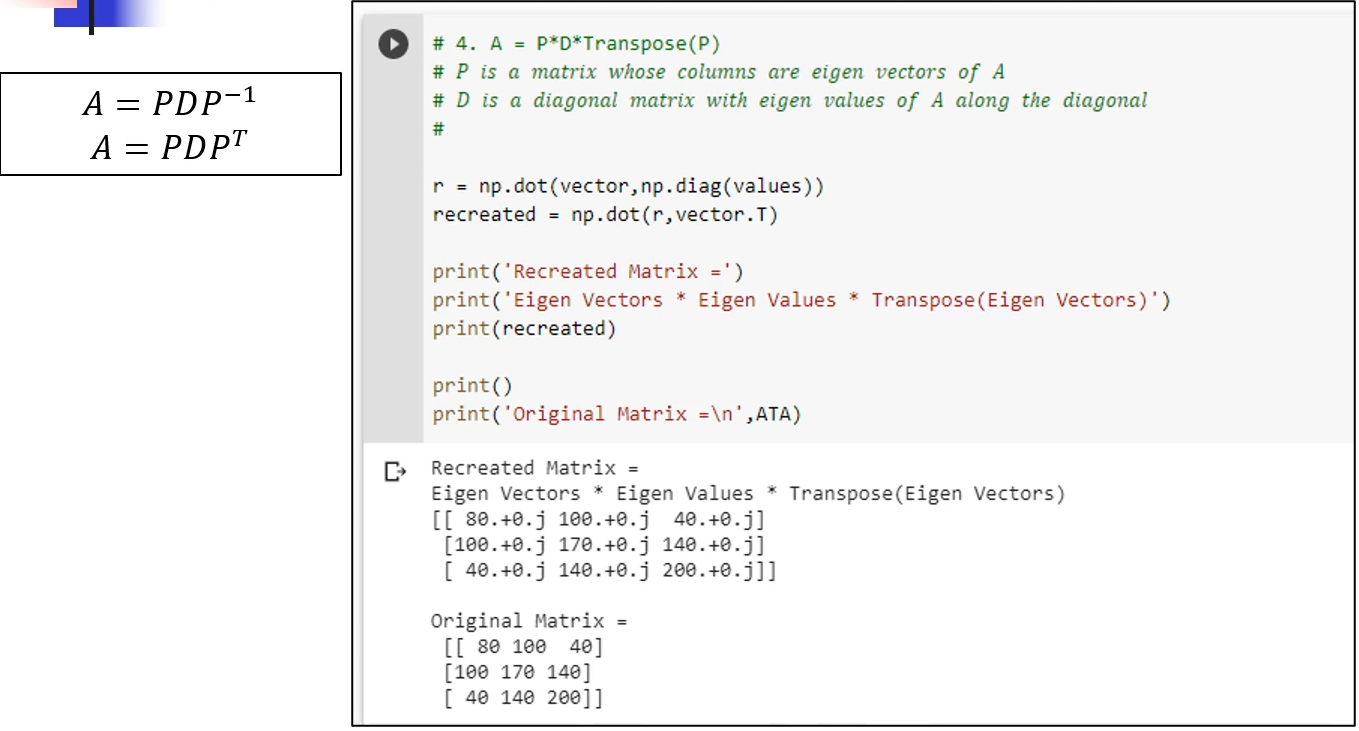

In [54]:
Image("../3. Images/Decomposition of ATA.png")

In [55]:
r = np.dot(vectors, np.diag(values)) # Eigen vectors x Eigen values (Diagonal Matrix)
A_recreated = np.dot(r, vectors.T)
print(A_recreated) 

[[ 80.+0.j 100.+0.j  40.+0.j]
 [100.+0.j 170.+0.j 140.+0.j]
 [ 40.+0.j 140.+0.j 200.+0.j]]


In [56]:
# Calculate the eigenvalues and eigenvectors of AAT

values, vectors = lg.eig(AAT)
print(values)
print()
print(vectors)

[360.+0.j  90.+0.j]

[[ 0.9487 -0.3162]
 [ 0.3162  0.9487]]


In [57]:
r = np.dot(vectors, np.diag(values)) # Eigen vectors x Eigen values (Diagonal Matrix)
A_recreated = np.dot(r, vectors.T)
print(A_recreated) 

[[333.+0.j  81.+0.j]
 [ 81.+0.j 117.+0.j]]


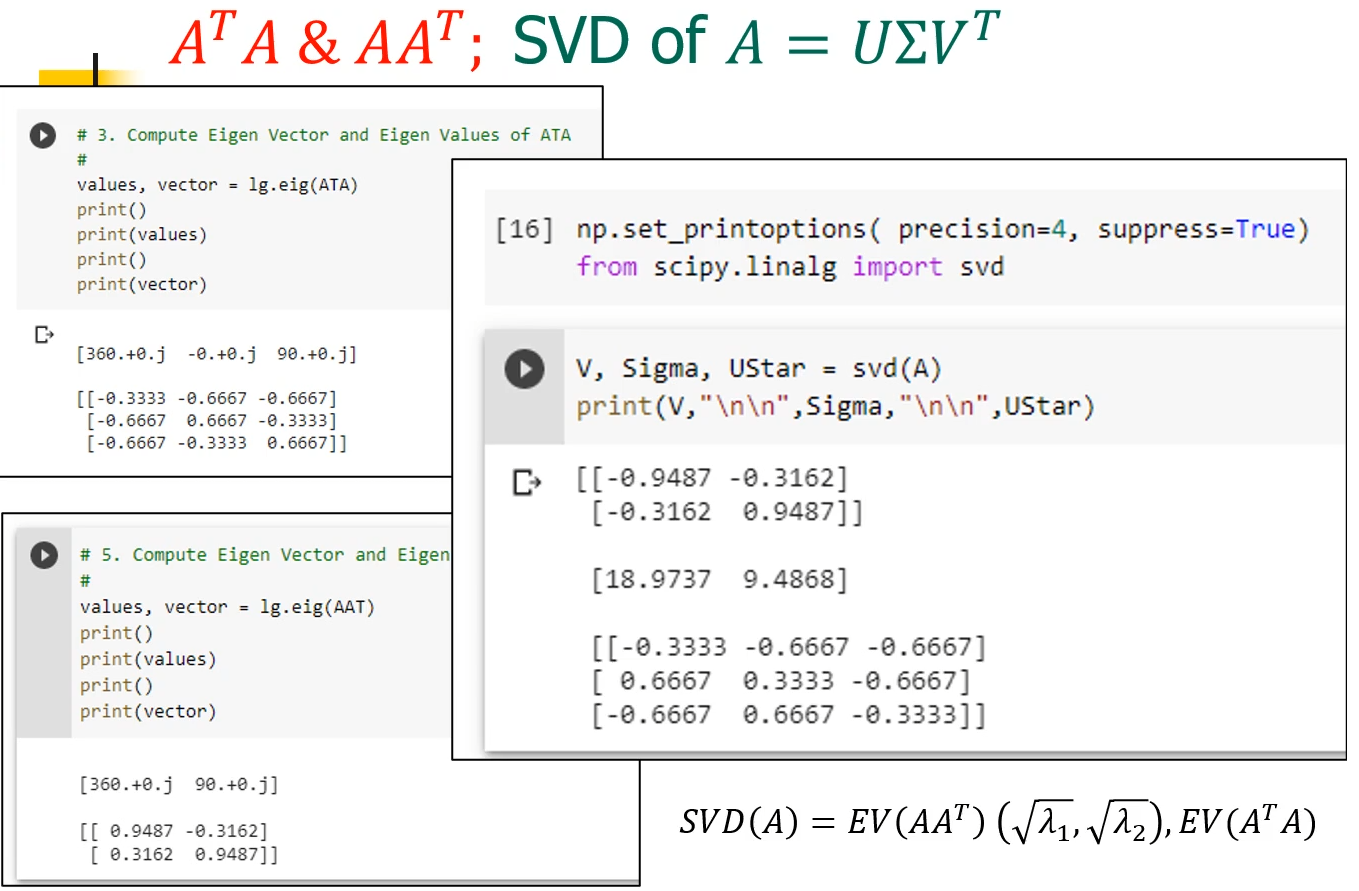

In [58]:
Image("../3. Images/SVD Decomposition - 1.png")

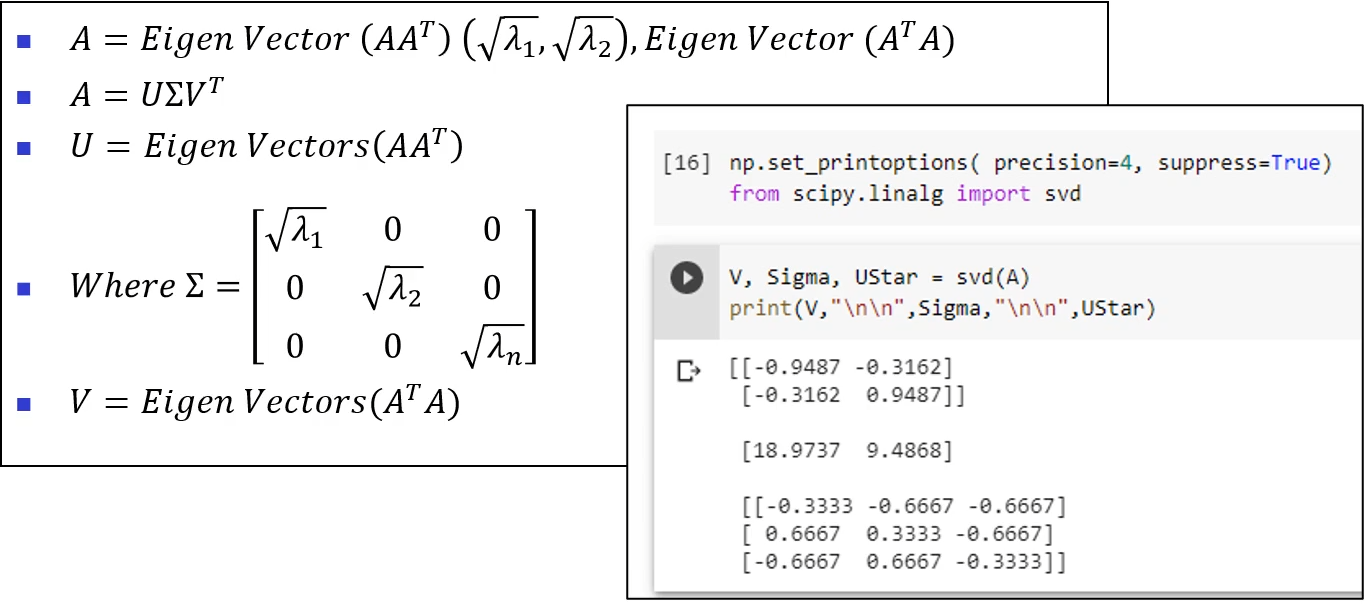

In [60]:
Image("../3. Images/SVD Decomposition - 2.png")

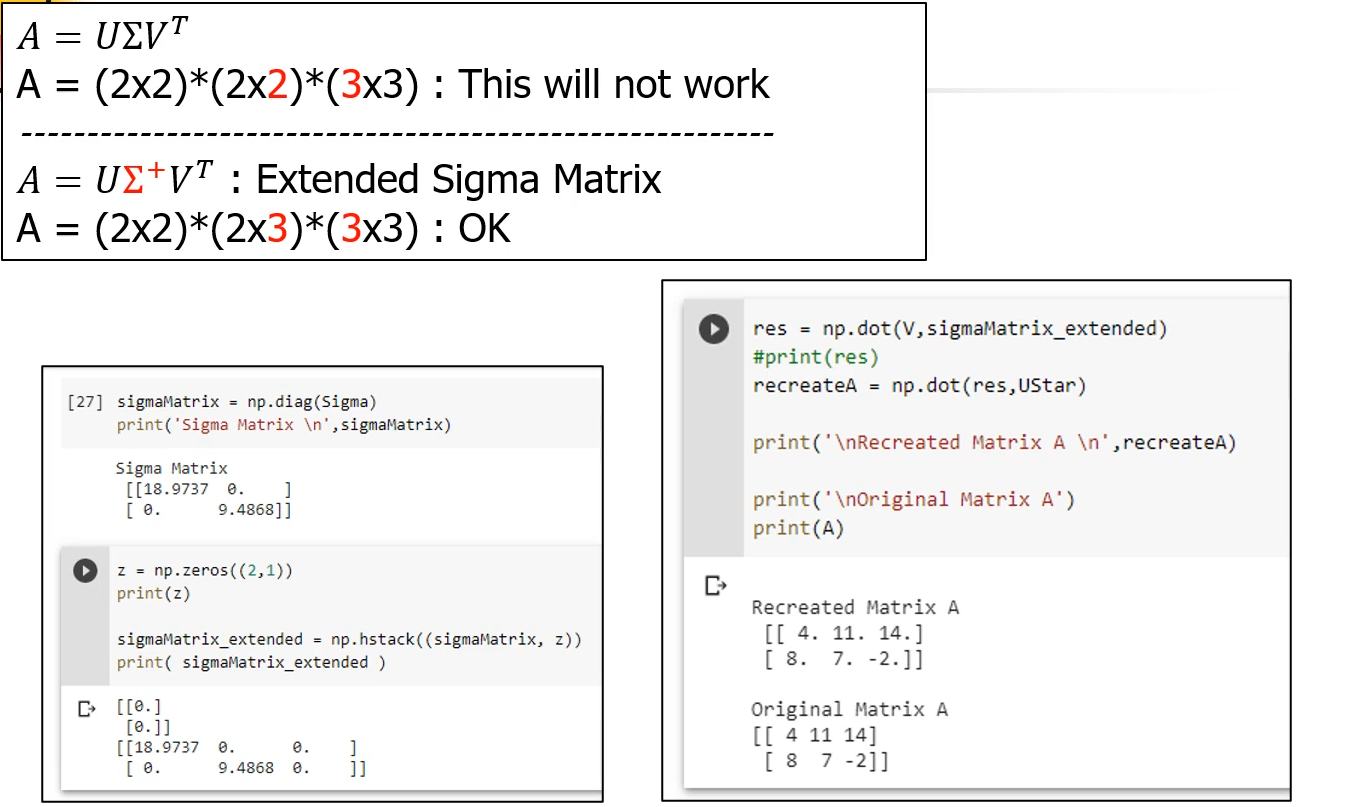

In [61]:
Image("../3. Images/Verification of SVD.png")

<h4 style = 'color:green'>1.4.2.4 Applications of SVD</h4>

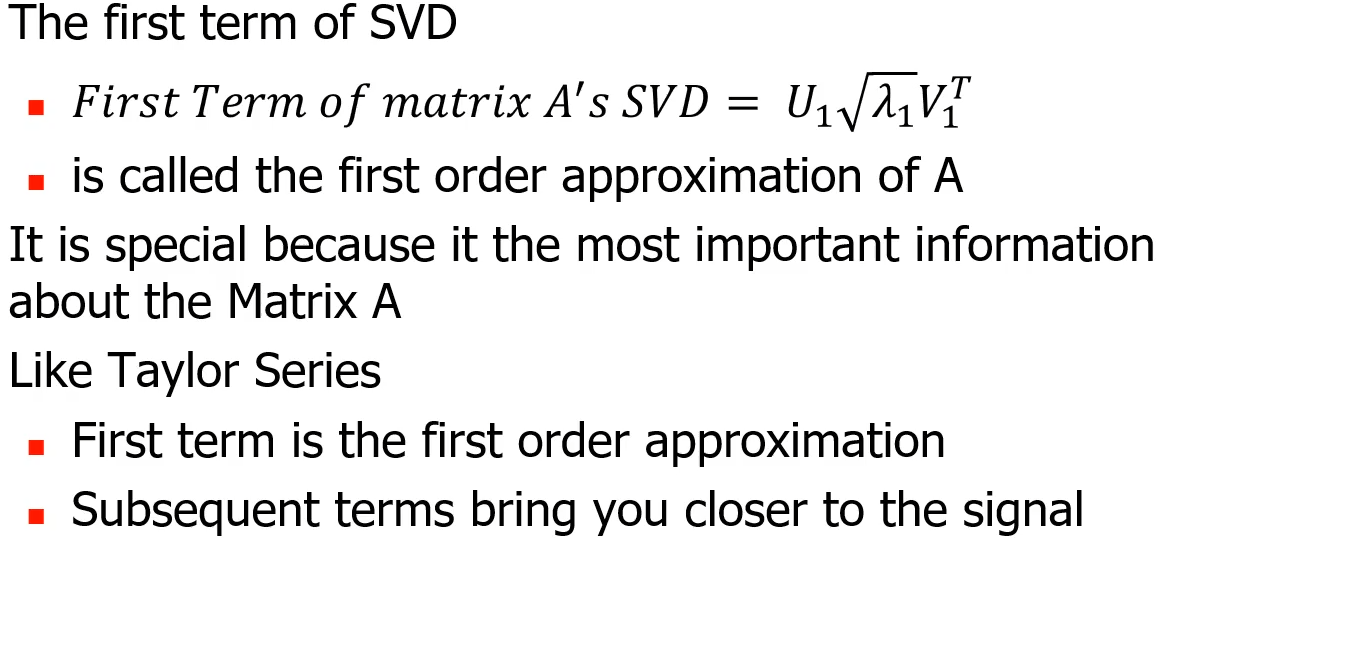

In [63]:
Image("../3. Images/Taylor Series - 1.png")

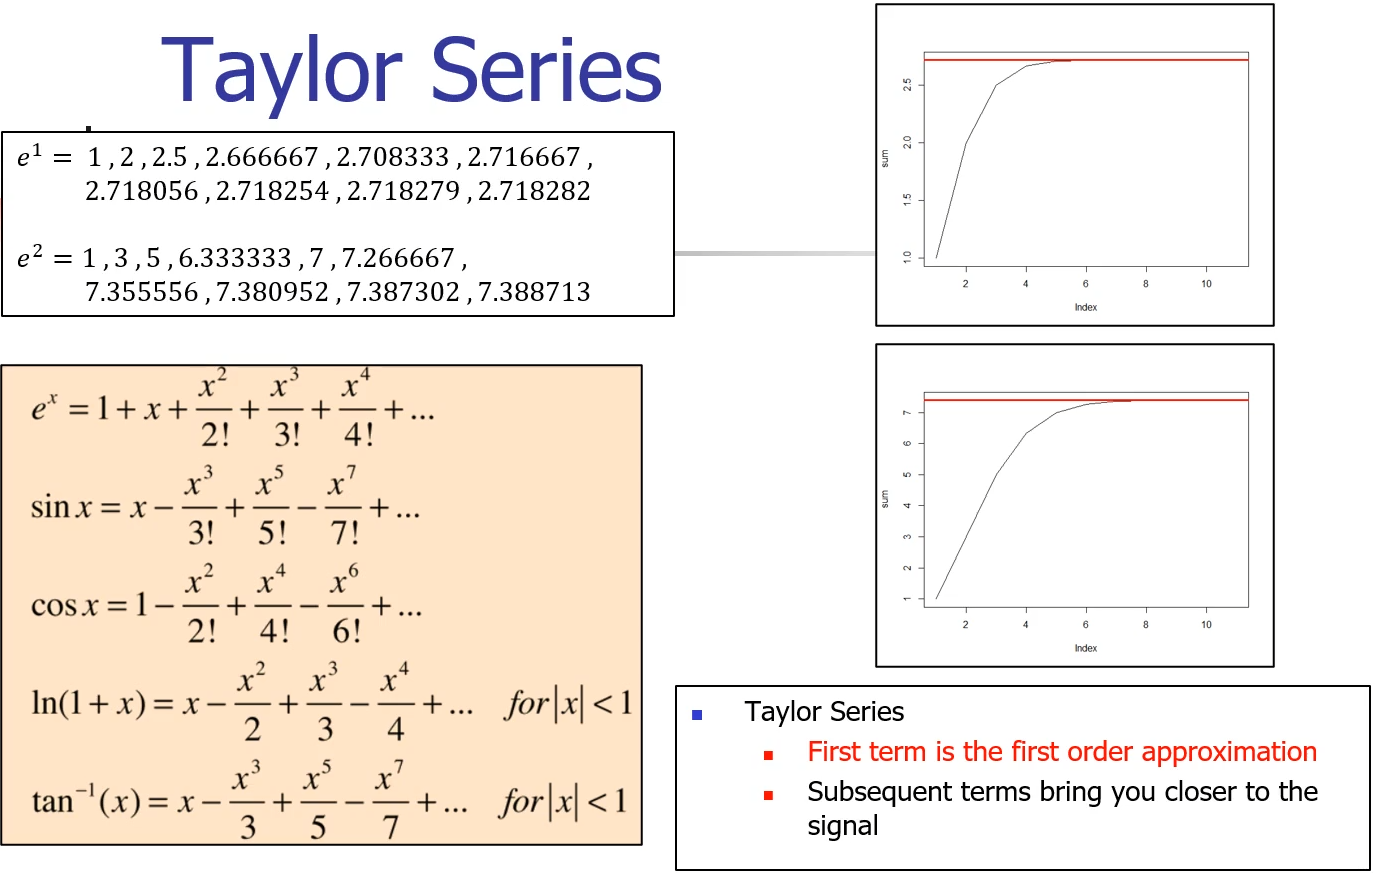

In [64]:
Image("../3. Images/Taylor Series.png")

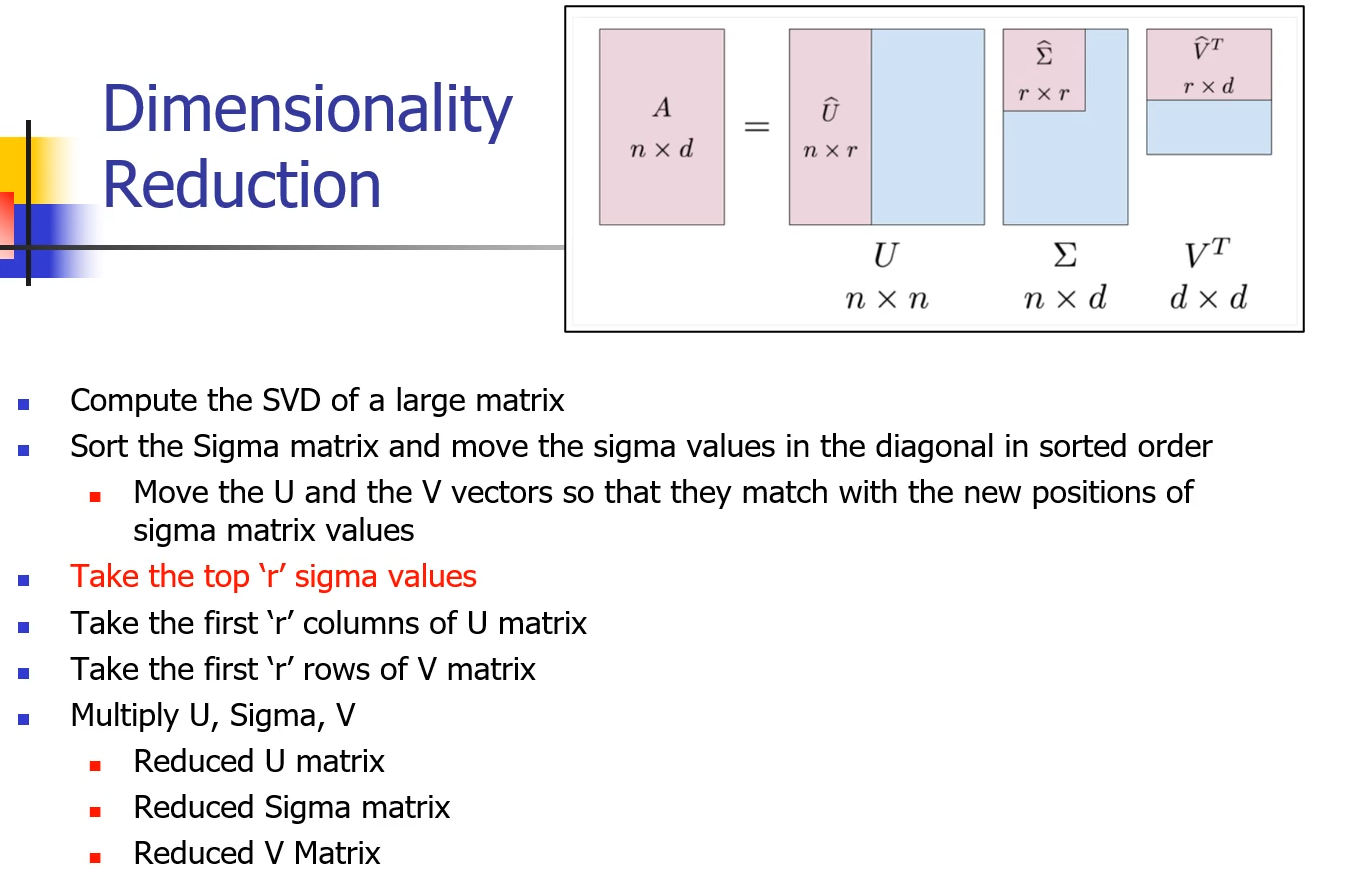

In [65]:
Image("../3. Images/Dimensionality Reduction.png")

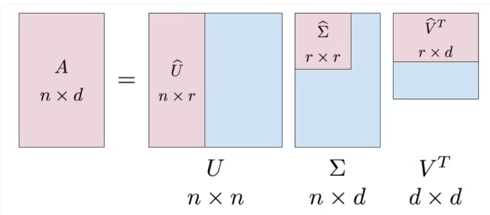

In [92]:
Image("../3. Images/SVD Dimensionality Reduction.png")

In [66]:
# Let's use SVD to reduce the dimensionality of a dataset

A = np.array([
    [5, 10, 15, 6],
    [2, 3, 0, -7],
    [-2, -3, 36, 42],
    [35, 56, 67, 92],
    [49, 21, 22, -3],
    [0, -5, 5, 93]
])
A

array([[ 5, 10, 15,  6],
       [ 2,  3,  0, -7],
       [-2, -3, 36, 42],
       [35, 56, 67, 92],
       [49, 21, 22, -3],
       [ 0, -5,  5, 93]])

In [93]:
# Compute the SVD

U, S, VT = lg.svd(A)

print(U)
print()
print(S)
print()
print(VT)

[[-0.0969 -0.136  -0.2027 -0.0138 -0.7214  0.6406]
 [ 0.0276 -0.0839 -0.0083 -0.0691  0.6686  0.7351]
 [-0.3063  0.1487 -0.5646  0.7396  0.1322 -0.0286]
 [-0.8025 -0.3182 -0.1869 -0.4349  0.1023 -0.1422]
 [-0.1501 -0.6426  0.561   0.4993 -0.0214  0.005 ]
 [-0.4791  0.6619  0.5389  0.098  -0.0648  0.1678]]

[160.6719  75.5724  30.3537  20.5188]

[[-0.2194 -0.2842 -0.4478 -0.8189]
 [-0.5792 -0.4854 -0.3816  0.5323]
 [ 0.6934 -0.0573 -0.687   0.2097]
 [ 0.3683 -0.8248  0.4265 -0.0457]]


In [68]:
# Create the extended Sigma matrix so the dimensions match the original matrix
sigma_matrix = np.diag(S)
sigma_matrix

array([[160.6719,   0.    ,   0.    ,   0.    ],
       [  0.    ,  75.5724,   0.    ,   0.    ],
       [  0.    ,   0.    ,  30.3537,   0.    ],
       [  0.    ,   0.    ,   0.    ,  20.5188]])

In [70]:
z = np.zeros((2, 4)) #We need to add two rows of zeros to the Sigma matrix
z

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [71]:
sigma_matrix_extended = np.vstack([sigma_matrix, z])
sigma_matrix_extended

array([[160.6719,   0.    ,   0.    ,   0.    ],
       [  0.    ,  75.5724,   0.    ,   0.    ],
       [  0.    ,   0.    ,  30.3537,   0.    ],
       [  0.    ,   0.    ,   0.    ,  20.5188],
       [  0.    ,   0.    ,   0.    ,   0.    ],
       [  0.    ,   0.    ,   0.    ,   0.    ]])

In [79]:
# Recreate the original matrix
r = np.dot(U, sigma_matrix_extended)
A_recreated = np.dot(r, VT)
A_recreated

array([[ 5., 10., 15.,  6.],
       [ 2.,  3.,  0., -7.],
       [-2., -3., 36., 42.],
       [35., 56., 67., 92.],
       [49., 21., 22., -3.],
       [-0., -5.,  5., 93.]])

In [75]:
# Original matrix
A

array([[ 5, 10, 15,  6],
       [ 2,  3,  0, -7],
       [-2, -3, 36, 42],
       [35, 56, 67, 92],
       [49, 21, 22, -3],
       [ 0, -5,  5, 93]])

In [84]:
# Truncate the Sigma matrix to reduce the dimensionality of the dataset
# Here I am going to use only the first two columns to create the original matrix, thereby reducing the dimensionality of the dataset
sigma_significant_num = 2

In [98]:
truncated_U = U[:, :sigma_significant_num] # All rows, but only the first two columns
truncated_sigma = sigma_matrix[:sigma_significant_num, :sigma_significant_num] # Only the first two rows and two columns
truncated_VT = VT[:sigma_significant_num, :] # Only the first two rows and all columns

In [87]:
# truncated_U: 6x2
truncated_U

array([[-0.0969, -0.136 ],
       [ 0.0276, -0.0839],
       [-0.3063,  0.1487],
       [-0.8025, -0.3182],
       [-0.1501, -0.6426],
       [-0.4791,  0.6619]])

In [99]:
# truncated_sigma: 2x2
truncated_sigma

array([[160.6719,   0.    ],
       [  0.    ,  75.5724]])

In [91]:
# truncated_VT: 2x4
truncated_VT

array([[-0.2194, -0.2842, -0.4478, -0.8189],
       [-0.5792, -0.4854, -0.3816,  0.5323]])

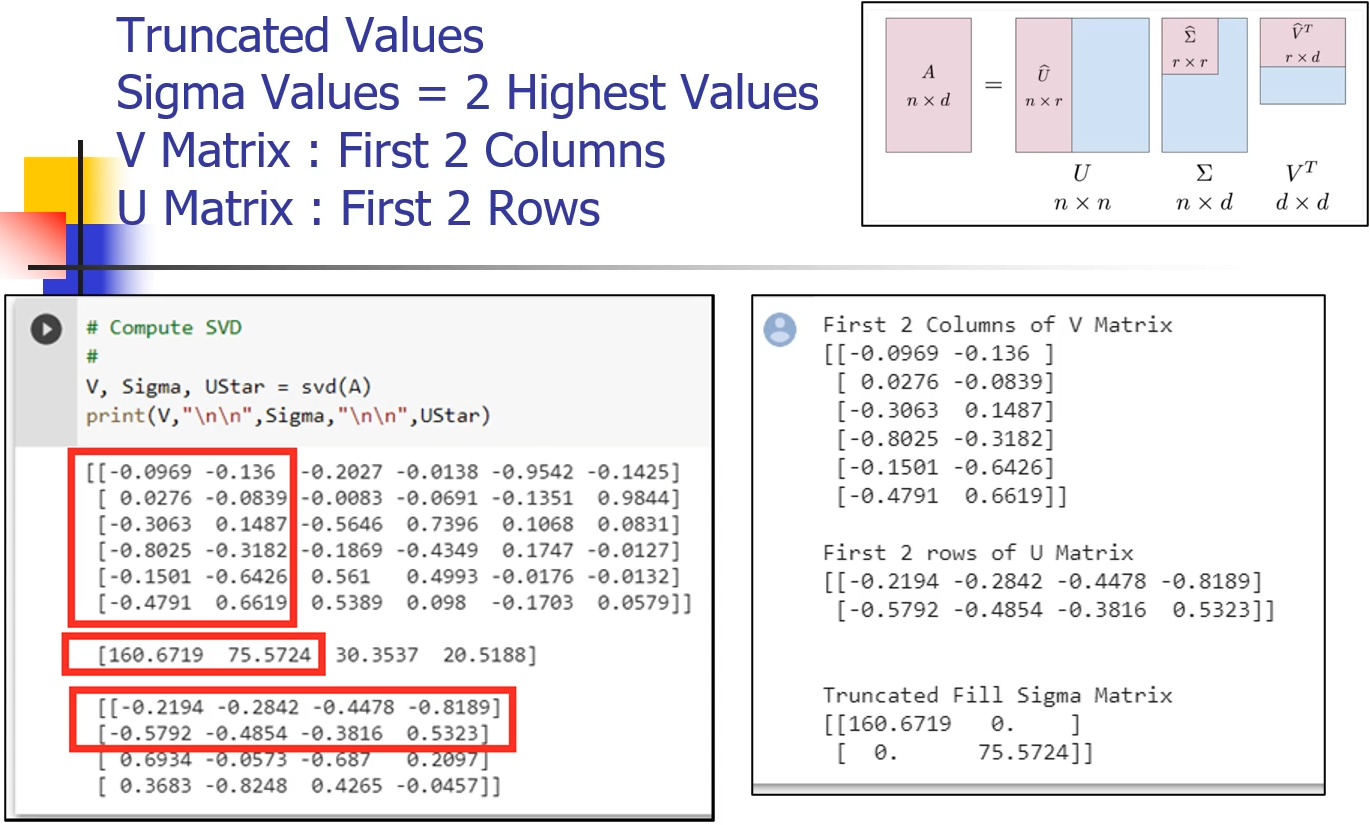

In [94]:
Image("../3. Images/SVD Dimensionality Reduction - 2.png")

In [100]:
# Recreate the original matrix using the truncated U, truncated Sigma and truncated VT
# There are two ways to do this
# 1. r1 = truncated_U x truncated_sigma_diag
# 2. r2 = truncated_sigma_diag x truncated_VT

r1 = np.dot(truncated_U, truncated_sigma)
print("First 2 columns of U x Diagonal of Sigma")
print(r1)

First 2 columns of U x Diagonal of Sigma
[[ -15.569   -10.2796]
 [   4.4408   -6.3406]
 [ -49.2218   11.2346]
 [-128.9337  -24.047 ]
 [ -24.1147  -48.5649]
 [ -76.9747   50.0229]]


In [101]:
r2 = np.dot(truncated_sigma, truncated_VT)
print("Diagonal of Sigma x First 2 rows of VT")
print(r2)

Diagonal of Sigma x First 2 rows of VT
[[ -35.2571  -45.6616  -71.9446 -131.5727]
 [ -43.7709  -36.6818  -28.8361   40.2271]]


<h3 style = 'color:lightgreen'>1.4.3 Latent Semantic Analysis</h3>

The purpose of Latent Semantic Analysis is to -

<ul>
    <li>Compute similarity index between documents and words so the documents can be classified based on topics</li>
    <li>Reduce the dimensionality of document matrix</li>
</ul>

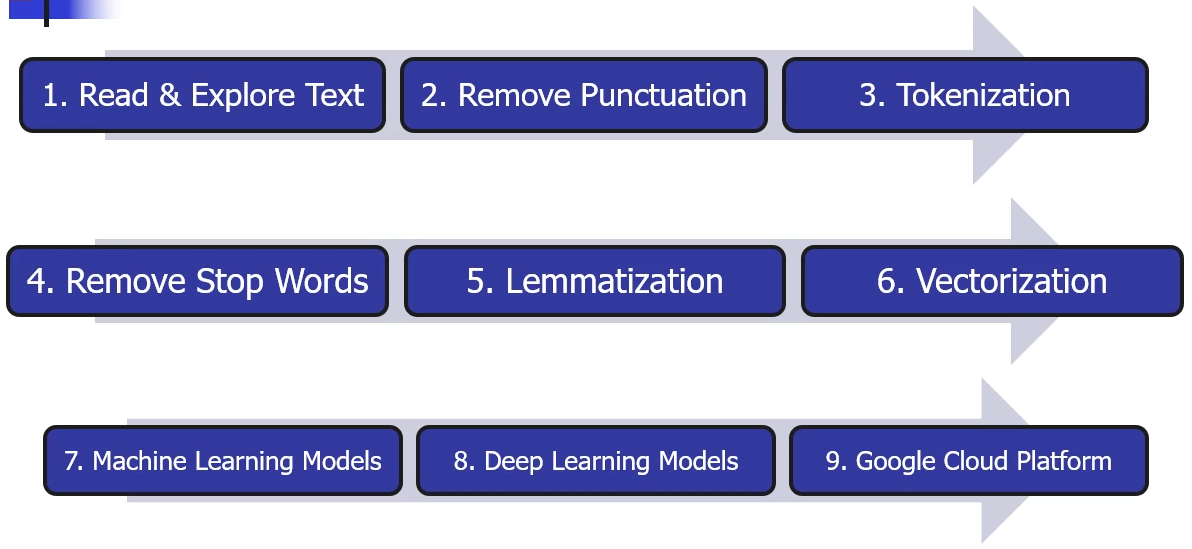

In [102]:
Image("../3. Images/NLP Pipeline.png")

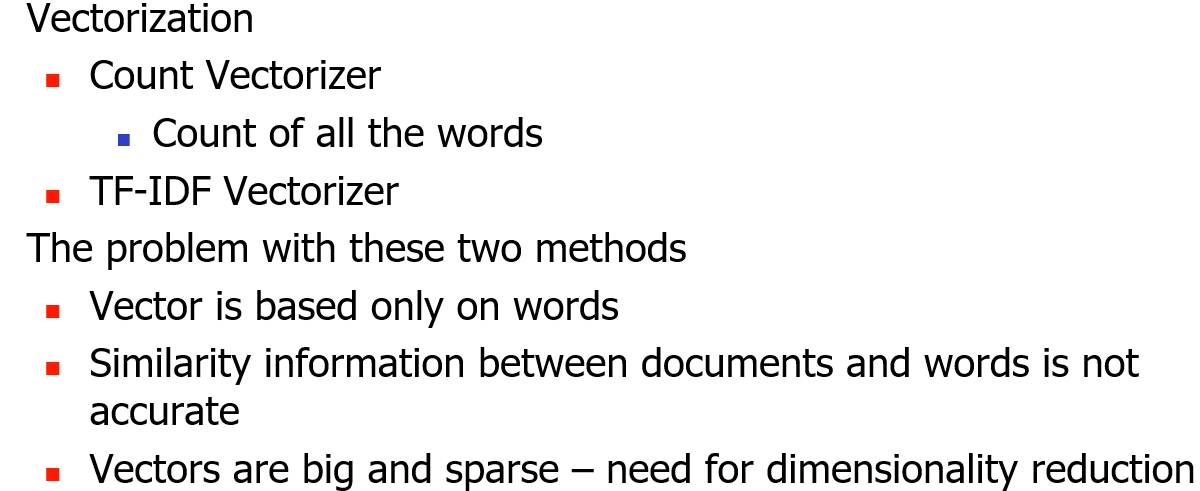

In [104]:
Image("../3. Images/Vectorization Problem.png")

In the following example, we have two sentences that have similar meaning, however the choice of words are different. If we use the cosine similarity, we can see that the similarity between the two sentences is low because there are not many words that are common between the two sentences.

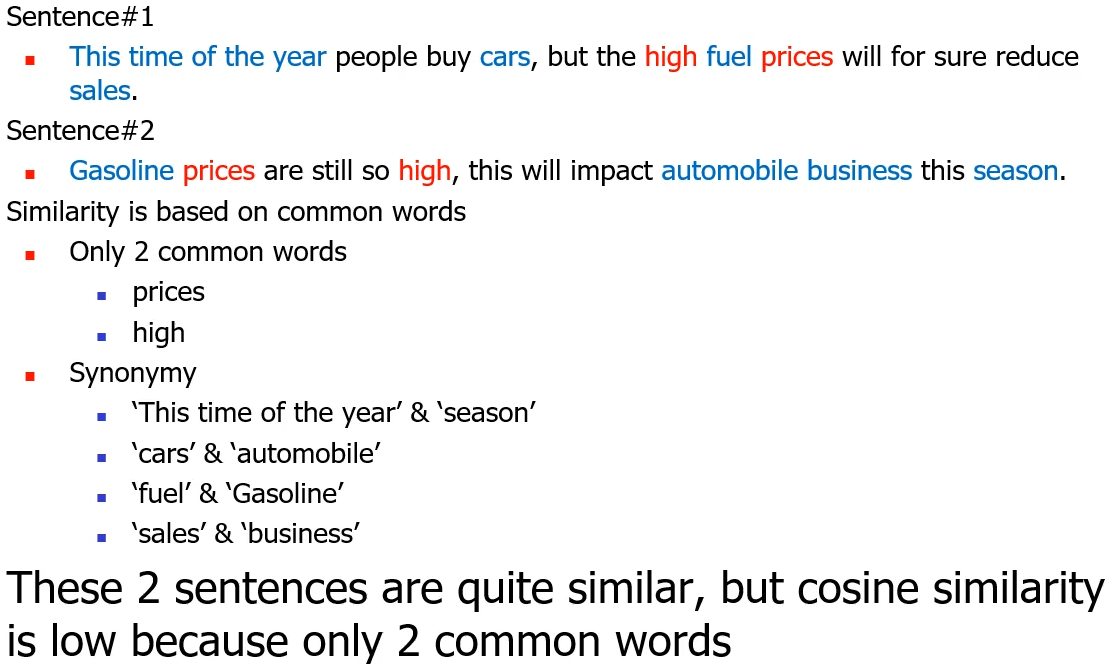

In [105]:
Image("../3. Images/Problem with Cosine Similarity.png")

In order to determine the similarity between two sentences, we need to use the polysemy and synonymy algorithms. This allows us to now only look at the words themselves, but in the context of how they have been used.

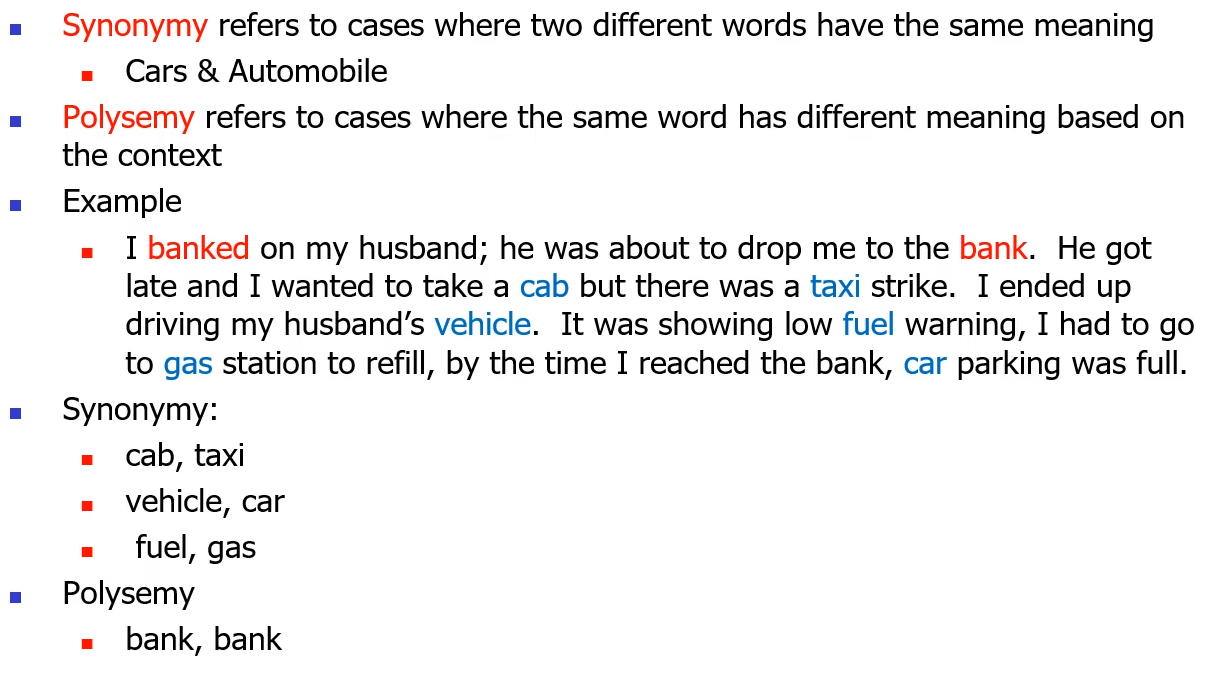

In [106]:
Image("../3. Images/Synonymy and Polysemy.png")

In [107]:
corpus = [
    'the quick brown fox',
    'the slow brown dog',
    'the quick red dog',
    'the lazy yellow fox'
]
corpus

['the quick brown fox',
 'the slow brown dog',
 'the quick red dog',
 'the lazy yellow fox']

In [109]:
vectorizer = CountVectorizer()
bagofwords = vectorizer.fit_transform(corpus)
bagofwords.toarray()

array([[1, 0, 1, 0, 1, 0, 0, 1, 0],
       [1, 1, 0, 0, 0, 0, 1, 1, 0],
       [0, 1, 0, 0, 1, 1, 0, 1, 0],
       [0, 0, 1, 1, 0, 0, 0, 1, 1]], dtype=int64)

In [113]:
document_vector = pd.DataFrame(bagofwords.toarray(), columns=vectorizer.get_feature_names_out())
document_vector

brown  dog  fox  lazy  quick  red  slow  the  yellow
0      1    0    1     0      1    0     0    1       0
1      1    1    0     0      0    0     1    1       0
2      0    1    0     0      1    1     0    1       0
3      0    0    1     1      0    0     0    1       1

In [114]:
word_vector = document_vector.T
word_vector

0  1  2  3
brown   1  1  0  0
dog     0  1  1  0
fox     1  0  0  1
lazy    0  0  0  1
quick   1  0  1  0
red     0  0  1  0
slow    0  1  0  0
the     1  1  1  1
yellow  0  0  0  1

<h4 style = 'color:green'>1.4.3.1 Cosine Similarity based on Count Vectorizer</h4>

We first calculate the <b>Cosine Similarity</b> between each of the sentences in the corpus using the <b>Count Vectorizer</b> method. This approach is not very accuracte.

In [115]:
def normalize_vector(v):
    return v / np.sqrt(np.sum(v**2))

In [116]:
# Create vectors
A = bagofwords.toarray()[0]
B = bagofwords.toarray()[1]
C = bagofwords.toarray()[2]
D = bagofwords.toarray()[3]

vectors = [A, B, C, D]

In [117]:
# Create normalized vectors
A_normalized = normalize_vector(A)
B_normalized = normalize_vector(B)
C_normalized = normalize_vector(C)
D_normalized = normalize_vector(D)

normalized_vectors = [A_normalized, B_normalized, C_normalized, D_normalized]

In [118]:
print(f"Original Vectors:\n{vectors}")
print()
print(f"Normalized Vectors:\n{normalized_vectors}")

Original Vectors:
[array([1, 0, 1, 0, 1, 0, 0, 1, 0], dtype=int64), array([1, 1, 0, 0, 0, 0, 1, 1, 0], dtype=int64), array([0, 1, 0, 0, 1, 1, 0, 1, 0], dtype=int64), array([0, 0, 1, 1, 0, 0, 0, 1, 1], dtype=int64)]

Normalized Vectors:
[array([0.5, 0. , 0.5, 0. , 0.5, 0. , 0. , 0.5, 0. ]), array([0.5, 0.5, 0. , 0. , 0. , 0. , 0.5, 0.5, 0. ]), array([0. , 0.5, 0. , 0. , 0.5, 0.5, 0. , 0.5, 0. ]), array([0. , 0. , 0.5, 0.5, 0. , 0. , 0. , 0.5, 0.5])]


In [119]:
def calculate_cosine_similarity(v1, v2):
    return np.dot(v1, v2)

In [121]:
# Calculate Cosine Similarity between all vectors
number_of_documents = len(corpus)
cosine_similarity_matrix = np.zeros((number_of_documents, number_of_documents))
cosine_distance_matrix = np.zeros((number_of_documents, number_of_documents))

In [122]:
for i in range(number_of_documents):
    for j in range(number_of_documents):
        cosine_similarity_matrix[i, j] = calculate_cosine_similarity(normalized_vectors[i], normalized_vectors[j])
        cosine_distance_matrix[i, j] = 1 - cosine_similarity_matrix[i, j]

In [123]:
print(f"Cosine Similarity Matrix:\n{cosine_similarity_matrix}")

Cosine Similarity Matrix:
[[1.   0.5  0.5  0.5 ]
 [0.5  1.   0.5  0.25]
 [0.5  0.5  1.   0.25]
 [0.5  0.25 0.25 1.  ]]


In [124]:
print(f"Cosine Distance Matrix:\n{cosine_distance_matrix}")

Cosine Distance Matrix:
[[0.   0.5  0.5  0.5 ]
 [0.5  0.   0.5  0.75]
 [0.5  0.5  0.   0.75]
 [0.5  0.75 0.75 0.  ]]


<h4 style = 'color:green'>1.4.3.2 Cosine Similarity based on Singular Value Decomposition (SVD)</h4>

In the following section, we calculate the <b>Cosine Similarity</b> between each of the sentences in the corpus after performing <b>Singular Value Decomposition</b>. This approach will produce far better results.

The Document Matrix and the Term (Word) Matrix are basically transpose of the same matrix, as we see below.

In [125]:
A_word = bagofwords.todense().T
A_document = bagofwords.todense()

In [126]:
print(f"Word Vector:\n{A_word}")

Word Vector:
[[1 1 0 0]
 [0 1 1 0]
 [1 0 0 1]
 [0 0 0 1]
 [1 0 1 0]
 [0 0 1 0]
 [0 1 0 0]
 [1 1 1 1]
 [0 0 0 1]]


In [127]:
print(f"Document Vector:\n{A_document}")

Document Vector:
[[1 0 1 0 1 0 0 1 0]
 [1 1 0 0 0 0 1 1 0]
 [0 1 0 0 1 1 0 1 0]
 [0 0 1 1 0 0 0 1 1]]


In [128]:
# Calculate SVD for the word vector
U, S, VT = lg.svd(A_word)

print(f"U:\n{U}")
print()
print(f"S:\n{S}")
print()
print(f"VT:\n{VT}")

U:
[[-0.3539 -0.1403  0.5    -0.434   0.0142  0.4555 -0.3687 -0.2488  0.1057]
 [-0.3342 -0.4594 -0.      0.421  -0.1102 -0.4708 -0.3055 -0.4157 -0.    ]
 [-0.3264  0.5197  0.     -0.2858 -0.5067 -0.2899  0.273  -0.3394 -0.1057]
 [-0.1396  0.4303  0.      0.3588  0.4327  0.2285 -0.1319 -0.2765 -0.5774]
 [-0.3539 -0.1403 -0.5    -0.434   0.5769 -0.1434  0.1885 -0.129   0.1057]
 [-0.1671 -0.2297 -0.5     0.2105 -0.3823  0.6365  0.2099 -0.1724  0.    ]
 [-0.1671 -0.2297  0.5     0.2105  0.1804  0.0375  0.767  -0.0526 -0.    ]
 [-0.6606  0.0603  0.      0.1352 -0.0844 -0.0222 -0.0928  0.7171 -0.1057]
 [-0.1396  0.4303  0.      0.3588  0.1584  0.0836 -0.0483 -0.1012  0.7887]]

S:
[3.0119 1.8298 1.4142 1.2571]

VT:
[[-0.5627 -0.5033 -0.5033 -0.4204]
 [ 0.1637 -0.4203 -0.4203  0.7873]
 [-0.      0.7071 -0.7071  0.    ]
 [-0.8103  0.2646  0.2646  0.451 ]]


In [131]:
# Take the first two columns from the matrices
def truncate_svd(U, S, VT, k):
    """
    Truncate the SVD matrices

    Parameters
    ----------
    U : numpy.ndarray
        U matrix from SVD decomposition
    S : numpy.ndarray
        Singular values from SVD decomposition
    VT : numpy.ndarray
        VT matrix from SVD decomposition
    k : int
        Number of singular values/columns to retain

    Returns
    -------
    truncated_U : numpy.ndarray
        Truncated U matrix
    truncated_S : numpy.ndarray
        Truncated singular values
    truncated_VT : numpy.ndarray
        Truncated VT matrix

    """
    truncated_U = U[:, :k]
    truncated_S = S[:k]
    truncated_S = np.diag(truncated_S)
    truncated_VT = VT[:k, :]
    return truncated_U, truncated_S, truncated_VT

In [132]:
sigma_significant_num = 2
truncated_U, truncated_sigma, truncated_VT = truncate_svd(U, S, VT, sigma_significant_num)

In [133]:
# The original matrix had 4 columns and 9 rows (A_word), but after performing SVD, I have 2 columns and 9 rows.
reduced_word_vector = np.dot(truncated_U, truncated_sigma)
print(f"Reduced Word Vector:\n{reduced_word_vector}")

Reduced Word Vector:
[[-1.066  -0.2566]
 [-1.0066 -0.8407]
 [-0.9831  0.951 ]
 [-0.4204  0.7873]
 [-1.066  -0.2566]
 [-0.5033 -0.4203]
 [-0.5033 -0.4203]
 [-1.9897  0.1103]
 [-0.4204  0.7873]]


In [134]:
v0 = reduced_word_vector[:, 0]
v1 = reduced_word_vector[:, 1]

reduced_matrix_word_normalized_v0 = normalize_vector(v0)
reduced_matrix_word_normalized_v1 = normalize_vector(v1)

reduced_matrix_word_norm = np.vstack([reduced_matrix_word_normalized_v0, reduced_matrix_word_normalized_v1]).T
df = pd.DataFrame(reduced_matrix_word_norm,
                  columns = [['Topic 1', 'Topic 2']])
df

Topic 1   Topic 2
0 -0.353937 -0.140256
1 -0.334199 -0.459436
2 -0.326416  0.519736
3 -0.139578  0.430274
4 -0.353937 -0.140256
5 -0.167100 -0.229718
6 -0.167100 -0.229718
7 -0.660615  0.060300
8 -0.139578  0.430274

In [138]:
# Another way to calculate the reduced matrix and LSA is by using scikit-learn's TruncatedSVD

sigma_significant_num = 2
svd = TruncatedSVD(n_components=sigma_significant_num)
lsa = svd.fit_transform(bagofwords.toarray().T)

df = pd.DataFrame(lsa, columns = ['Topic 1', 'Topic 2'])
df

Topic 1   Topic 2
0  1.066024 -0.256637
1  1.006575 -0.840663
2  0.983131  0.950998
3  0.420395  0.787304
4  1.066024 -0.256637
5  0.503287 -0.420332
6  0.503287 -0.420332
7  1.989706  0.110335
8  0.420395  0.787304

In [143]:
A_document

matrix([[1, 0, 1, 0, 1, 0, 0, 1, 0],
        [1, 1, 0, 0, 0, 0, 1, 1, 0],
        [0, 1, 0, 0, 1, 1, 0, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 1]], dtype=int64)

In [141]:
# Let's calculate SVD for the document vector

# Calculate SVD for the word vector
U, S, VT = lg.svd(A_document)

print(f"U:\n{U}")
print()
print(f"S:\n{S}")
print()
print(f"VT:\n{VT}")

U:
[[ 0.5627 -0.1637  0.      0.8103]
 [ 0.5033  0.4203 -0.7071 -0.2646]
 [ 0.5033  0.4203  0.7071 -0.2646]
 [ 0.4204 -0.7873  0.     -0.451 ]]

S:
[3.0119 1.8298 1.4142 1.2571]

VT:
[[ 0.3539  0.3342  0.3264  0.1396  0.3539  0.1671  0.1671  0.6606  0.1396]
 [ 0.1403  0.4594 -0.5197 -0.4303  0.1403  0.2297  0.2297 -0.0603 -0.4303]
 [-0.5    -0.      0.      0.      0.5     0.5    -0.5    -0.      0.    ]
 [ 0.434  -0.421   0.2858 -0.3588  0.434  -0.2105 -0.2105 -0.1352 -0.3588]
 [-0.0783 -0.0628 -0.3062  0.5687  0.5687 -0.3217  0.3253 -0.1843 -0.0783]
 [ 0.3624 -0.4189 -0.0893  0.345  -0.155   0.692   0.1745 -0.1181 -0.1376]
 [-0.4028 -0.2306  0.3292 -0.3611  0.1389  0.157   0.6987 -0.0653  0.0972]
 [-0.2158 -0.4816 -0.3955 -0.0863 -0.0863 -0.1297 -0.0002  0.6977 -0.2158]
 [ 0.2652 -0.1883 -0.4185 -0.2939  0.2061  0.035  -0.0241 -0.0528  0.7652]]


In [142]:
sigma_significant_num = 2
truncated_U, truncated_sigma, truncated_VT = truncate_svd(U, S, VT, sigma_significant_num)

In [150]:
# The original matrix had 4 rows and 9 columns (A_document), but after performing SVD, I have 4 rows and 2 columns.
reduced_document_vector = np.dot(truncated_U, truncated_sigma)
print(f"Reduced Document Vector:\n{reduced_document_vector}")

Reduced Document Vector:
[[ 1.6949 -0.2995]
 [ 1.5159  0.7691]
 [ 1.5159  0.7691]
 [ 1.2662 -1.4406]]


In [151]:
v0 = reduced_document_vector[:, 0]
v1 = reduced_document_vector[:, 1]

reduced_matrix_document_normalized_v0 = normalize_vector(v0)
reduced_matrix_document_normalized_v1 = normalize_vector(v1)

reduced_matrix_document_norm = np.vstack([reduced_matrix_document_normalized_v0, reduced_matrix_document_normalized_v1]).T
df = pd.DataFrame(reduced_matrix_document_norm,
                  columns = [['Topic 1', 'Topic 2']])
df

Topic 1   Topic 2
0  0.562736 -0.163695
1  0.503287  0.420332
2  0.503287  0.420332
3  0.420395 -0.787304

In [152]:
# Using scikit-learn's TruncatedSVD to calculate the reduced matrix and LSA for A_document

sigma_significant_num = 2
svd = TruncatedSVD(n_components=sigma_significant_num)
lsa = svd.fit_transform(bagofwords.toarray())

df = pd.DataFrame(lsa, columns = ['Topic 1', 'Topic 2'])
df

Topic 1   Topic 2
0  1.694905  0.299524
1  1.515851 -0.769110
2  1.515851 -0.769110
3  1.266186  1.440585

<h4 style = 'color:green'>1.4.3.3 Analysis of Latent Symantec Analysis (LSA)</h4>

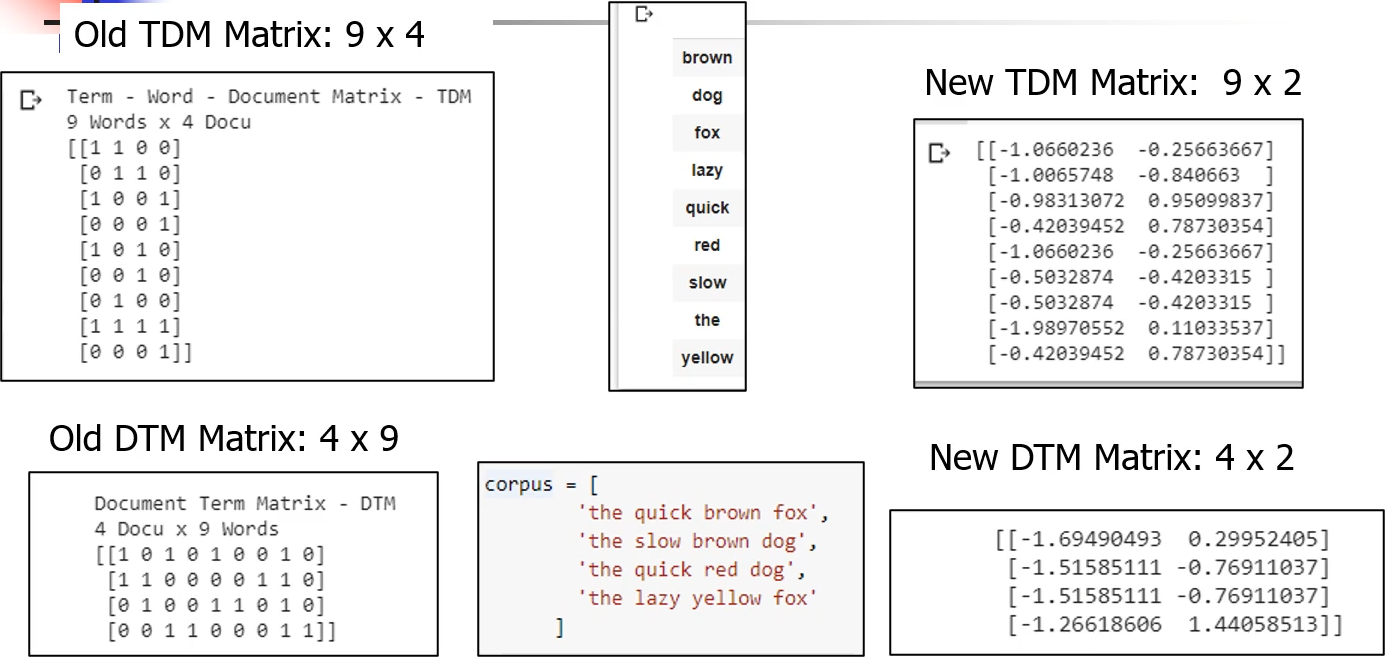

In [153]:
Image("../3. Images/LSA - Dimensionality Reduction.png")

In [154]:
# Create vectors

A = reduced_document_vector[0]
B = reduced_document_vector[1]
C = reduced_document_vector[2]
D = reduced_document_vector[3]

vectors = [A, B, C, D]
vectors

[array([ 1.6949, -0.2995]),
 array([1.5159, 0.7691]),
 array([1.5159, 0.7691]),
 array([ 1.2662, -1.4406])]

In [155]:
# Create Normalized Vectors

A_normalized = normalize_vector(A)
B_normalized = normalize_vector(B)
C_normalized = normalize_vector(C)
D_normalized = normalize_vector(D)

normalized_vectors = [A_normalized, B_normalized, C_normalized, D_normalized]
normalized_vectors

[array([ 0.9847, -0.174 ]),
 array([0.8918, 0.4525]),
 array([0.8918, 0.4525]),
 array([ 0.6602, -0.7511])]

In [156]:
# Let's calculate the cosine similarity between the documents using the reduced matrix
# Calculate the cosine similarity between all vectors
number_of_documents = len(corpus)
cosine_similarity_matrix = np.zeros((number_of_documents, number_of_documents))
cosine_distance_matrix = np.zeros((number_of_documents, number_of_documents))

for i in range(number_of_documents):
    for j in range(number_of_documents):
        cosine_similarity_matrix[i, j] = calculate_cosine_similarity(normalized_vectors[i], normalized_vectors[j])
        cosine_distance_matrix[i, j] = 1 - cosine_similarity_matrix[i, j]

print(f"Cosine Similarity Matrix:\n{cosine_similarity_matrix}")
print()
print(f"Cosine Distance Matrix:\n{cosine_distance_matrix}")

Cosine Similarity Matrix:
[[1.     0.7994 0.7994 0.7808]
 [0.7994 1.     1.     0.2489]
 [0.7994 1.     1.     0.2489]
 [0.7808 0.2489 0.2489 1.    ]]

Cosine Distance Matrix:
[[0.     0.2006 0.2006 0.2192]
 [0.2006 0.     0.     0.7511]
 [0.2006 0.     0.     0.7511]
 [0.2192 0.7511 0.7511 0.    ]]


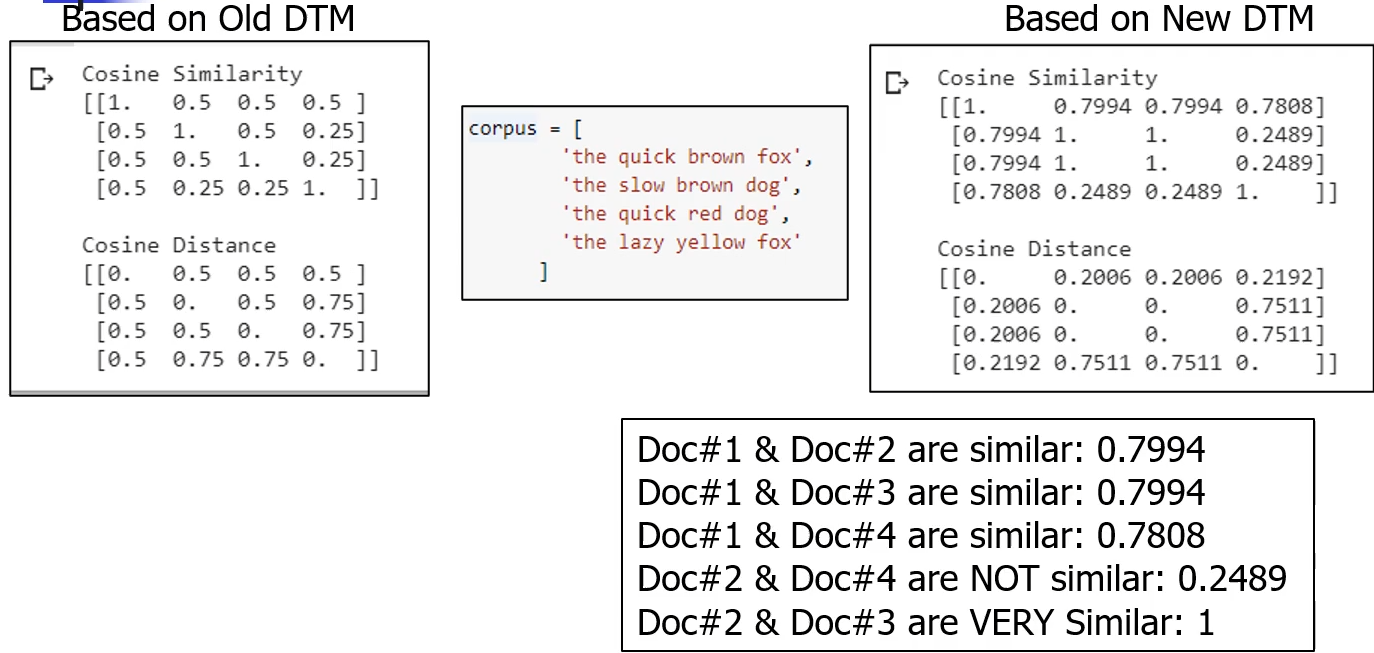

In [157]:
Image("../3. Images/Cosine Similarity and Distance - Comparison.png")

In [158]:
topic_encoded_df = pd.DataFrame(lsa, columns = ['Topic 1', 'Topic 2'])
topic_encoded_df['Corups'] = corpus
topic_encoded_df.set_index('Corups', inplace=True)
topic_encoded_df

Topic 1   Topic 2
Corups                                 
the quick brown fox  1.694905  0.299524
the slow brown dog   1.515851 -0.769110
the quick red dog    1.515851 -0.769110
the lazy yellow fox  1.266186  1.440585

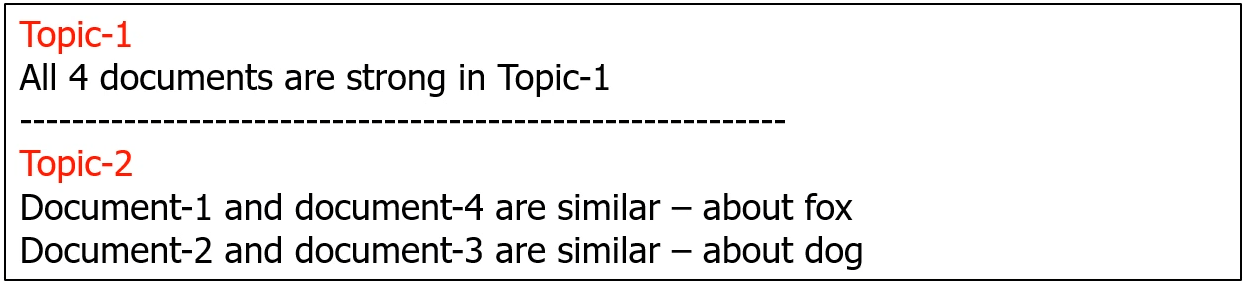

In [159]:
Image("../3. Images/Topic Similarity.png")

In [161]:
encoding_matrix = pd.DataFrame(svd.components_, index=['Topic 1', 'Topic 2'], columns=vectorizer.get_feature_names_out()).T
encoding_matrix

Topic 1   Topic 2
brown   0.353937 -0.140256
dog     0.334199 -0.459436
fox     0.326416  0.519736
lazy    0.139578  0.430274
quick   0.353937 -0.140256
red     0.167100 -0.229718
slow    0.167100 -0.229718
the     0.660615  0.060300
yellow  0.139578  0.430274

In [163]:
# The most important words for Topic 1 is 'brown' and 'dog', while for Topic 2, it is 'quick' and 'fox' (we will ignore 'the' because it is a stop word)

encoding_matrix['abs_topic_1'] = np.abs(encoding_matrix['Topic 1'])
encoding_matrix['abs_topic_2'] = np.abs(encoding_matrix['Topic 2'])
encoding_matrix.sort_values(by=['abs_topic_1'], ascending=False)

Topic 1   Topic 2  abs_topic_1  abs_topic_2
the     0.660615  0.060300     0.660615     0.060300
brown   0.353937 -0.140256     0.353937     0.140256
quick   0.353937 -0.140256     0.353937     0.140256
dog     0.334199 -0.459436     0.334199     0.459436
fox     0.326416  0.519736     0.326416     0.519736
red     0.167100 -0.229718     0.167100     0.229718
slow    0.167100 -0.229718     0.167100     0.229718
lazy    0.139578  0.430274     0.139578     0.430274
yellow  0.139578  0.430274     0.139578     0.430274

In [165]:
# According to topic_2, the most important words are 'fox' and 'dog'.
encoding_matrix.sort_values(by=['abs_topic_2'], ascending=False)

Topic 1   Topic 2  abs_topic_1  abs_topic_2
fox     0.326416  0.519736     0.326416     0.519736
dog     0.334199 -0.459436     0.334199     0.459436
lazy    0.139578  0.430274     0.139578     0.430274
yellow  0.139578  0.430274     0.139578     0.430274
slow    0.167100 -0.229718     0.167100     0.229718
red     0.167100 -0.229718     0.167100     0.229718
brown   0.353937 -0.140256     0.353937     0.140256
quick   0.353937 -0.140256     0.353937     0.140256
the     0.660615  0.060300     0.660615     0.060300